In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
Data =pd.read_csv('delivery_time.csv')
Data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
Data.shape

(21, 2)

In [4]:
Data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
Data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
Data[Data.duplicated()].shape

(0, 2)

In [8]:
Data.rename({'Delivery Time' : 'Del_Time', 'Sorting Time' : 'Sort_Time'},axis=1, inplace = True)

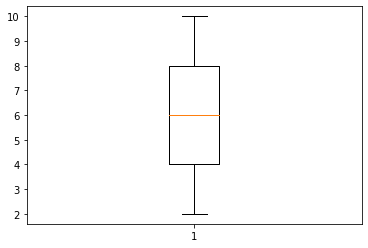

In [9]:
plt.boxplot(Data['Sort_Time'],data = Data)
plt.show()

<AxesSubplot:>

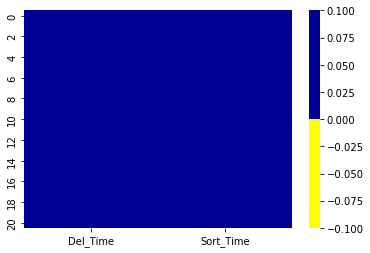

In [10]:
cols = Data.columns
colours =['#ffff00','#000099']
sns.heatmap(Data[cols].isnull(),cmap = sns.color_palette(colours))

<AxesSubplot:xlabel='Del_Time', ylabel='Sort_Time'>

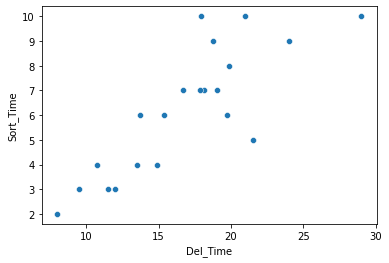

In [11]:
sns.scatterplot( x =Data['Del_Time'], y = Data ['Sort_Time'])

In [12]:
Data.corr()

,Del_Time,Sort_Time
Del_Time,1.000000,0.825997
Sort_Time,0.825997,1.000000


<AxesSubplot:xlabel='Del_Time', ylabel='Density'>

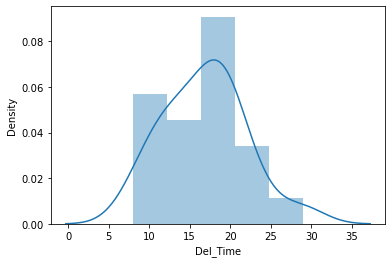

In [13]:
sns.distplot(Data['Del_Time'])

<AxesSubplot:xlabel='Sort_Time', ylabel='Density'>

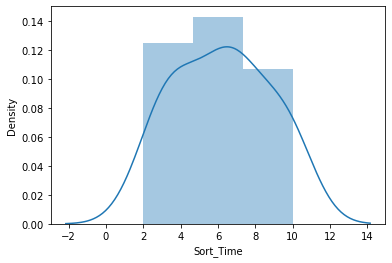

In [14]:
sns.distplot(Data['Sort_Time'])

In [15]:
import statsmodels.formula.api as smf
model = smf.ols('Del_Time~Sort_Time',data = Data).fit()

<AxesSubplot:xlabel='Del_Time', ylabel='Sort_Time'>

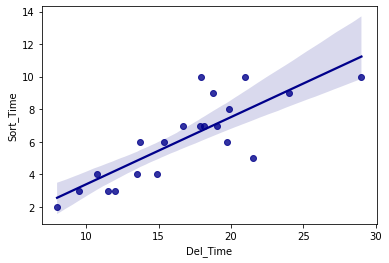

In [16]:
sns.regplot( x ='Del_Time',y = 'Sort_Time',data =Data,color ='darkblue')

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Del_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 26 May 2022   Prob (F-statistic):           3.98e-06
Time:                        12:26:36   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sort_Time      1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model.params

Intercept    6.582734
Sort_Time    1.649020
dtype: float64

In [19]:
model.tvalues

Intercept    3.823349
Sort_Time    6.387447
dtype: float64

In [20]:
model.pvalues

Intercept    0.001147
Sort_Time    0.000004
dtype: float64

In [21]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [22]:
model.mse_resid

8.613660132645544

In [23]:
np.sqrt(model.mse_resid)

2.9349037688901394

<function matplotlib.pyplot.show(close=None, block=None)>

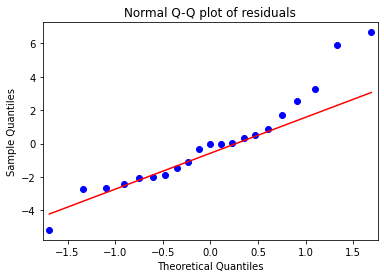

In [24]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line ='q')
plt.title('Normal Q-Q plot of residuals')
plt.show

In [25]:
data_pred = pd.DataFrame(data ={'Sort_Time':[20,25,10,3]})
data_pred

,Sort_Time
0,20
1,25
2,10
3,3


In [26]:
model.predict(data_pred)

0    39.563132
1    47.808231
2    23.072933
3    11.529794
dtype: float64